# MALIGNANT COMMENTS CLASSIFICATION:

Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’.                                                                                     
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.                                                   


The data set includes: 


-Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.             
-Highly Malignant: It denotes comments that are highly malignant and hurtful.                                               
-Rude: It denotes comments that are very rude and offensive.                                                               
-Threat: It contains indication of the comments that are giving any threat to someone.                                    
-Abuse: It is for comments that are abusive in nature.                                                                     
-Loathe: It describes the comments which are hateful and loathing in nature.                                               
-ID: It includes unique Ids associated with each comment text given.                                                       
-Comment text: This column contains the comments extracted from various social media platforms.                           
This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available.                                                            
You need to build a model that can differentiate between comments and its categories.                                      
Refer to the data set file provided along with this.                                                                    

In [1]:
# importing all required libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as stats
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import wordnet as wn
import re
import string
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# lets import train csv file to jupyter notebook
df=pd.read_csv("train.csv")
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
# lets import test csv file to jupyter notebook
df_test=pd.read_csv("test.csv")
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


# EDA(Exploratory Data Analysis) :

In [4]:
# lets check the names of the columns present in the train dataset
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

* Here we can see all the names of the columns present in our train dataset with Malignant as our target column.

In [5]:
# lets check the names of the columns present in the test dataset
df_test.columns

Index(['id', 'comment_text'], dtype='object')

* Here we can see the names of the columns present in our test dataset

In [6]:
# lets check shape of the train dataset
df.shape

(159571, 8)

* Here we can see that there are 1,59,571 rows present in 8 columns of train dataset.

In [7]:
# lets check the shape of the test dataset
df_test.shape

(153164, 2)

* Here we can see that there are 1,53,164 rows present in 2 columns of the test dataset

In [8]:
# lets check the information about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


* Here we can see that there are no Null values present in our train dataset

In [9]:
# lets check the information regarding the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


* Here we can see that there are no null values present in the test dataset as well.

In [10]:
# lets check the value counts of all the columns in the train dataset
df.value_counts()

id                comment_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [11]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

* Here 0 denotes No and 1 denotes Yes. so most of the messages are not Malignant.

In [12]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

* Here also we can see very few messages are Highly Malignant.

In [13]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

* Few of the messages are rude

In [14]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

* Here we can see very few messages have threat content.

In [15]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

* Here we can see few messages have abusive language.

In [16]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

* Here we can see that there are few messages have loathe or disgusting language.

In [17]:
# lets check the datatype of all the columns present in the train dataset
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

* Here we can see that there are two types of dtype present in the train dataset i.e. object and integer dtype.
* Here we can see that there is 1st column name id, id's are unique for all the comments dataset and it wont help in our model building, it will make the model more complex and less accurate. so, we must drop this column.

In [18]:
# lets drop the column id from train dataset
df.drop('id',axis=1,inplace=True)

* Here we have successfully dropped the column id from our train dataset

In [19]:
# lets check the presence of null value once again in train dataset
df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

* Here we are again confirmed that there are no null values present in this train dataset.

In [20]:
# lets check few comments present in the train dataset
df['comment_text'][9]

'alignment on this subject and which are contrary to those of DuLithgow'

In [21]:
df['comment_text'][27]

"Yes, because the mother of the child in the case against Michael Jackson was studied in here motives and reasonings and judged upon her character just as harshly as Wacko Jacko himself.  Don't tell me to ignore it and incriminate myself.  I am going to continue refuting the bullshit that Jayjg keeps throwing at me.   18:01, 16 Jun 2005 (UTC)"

In [22]:
df['comment_text'][5]

'"\n\nCongratulations from me as well, use the tools well. \xa0· talk "'

In [23]:
df['comment_text'][117]

'Also see this if you cant trust Murkoth Ramunni\nhttp://books.google.com/books?id=HHev0U1GfpEC&pg;=PA51&dq;=Thiyya+matrilineal&hl;=en&sa;=X&ei;=TlpPUd2aH8mWiQLgvIDgBA&ved;=0CDYQ6AEwAQ#v=onepage&q;=Thiyya%20matrilineal&f;=false'

* Here after observing some comments, We can clearly see that there is a need of text processing as there are many numbers, alphabets and special characters present in the comments which are not important or required for our model.

In [24]:
# lets create a new column showing length of words in comment_text in train dataset
df['before_clean']=df['comment_text'].map(lambda comment_text: len(comment_text))
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [25]:
# Lets create a new column named before clean showing no. of words present in comment_text column in test dataset
df_test['before_clean']=df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,before_clean
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


# Text Processing:

In [26]:
# lets download latest updated stopwords and wordnet.
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amitt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amitt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words=stopwords.words('english')
lemmatizer=wordnet.WordNetLemmatizer()
# lets clean the messages and remove or replace some words
def edited(text):
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    # lets remove '\n' in comment_text
    text= re.sub(r'\n',' ',text)
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [29]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df['comment_text'] = df['comment_text'].apply(edited)
df['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [30]:
#Creating a column 'len_after_cleaning'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df['len_after_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,99,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,116,56


In [31]:
# lets import wordcloud to jupyter notebook
!pip install wordcloud

In [32]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
def wcloud(df, label):
    
    # lets print only rows where the label value is 1 (ie. where comment is harsh)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4500)

    wc.generate(" ".join(text))

    plt.figure(figsize=(27,27))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=18)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244))

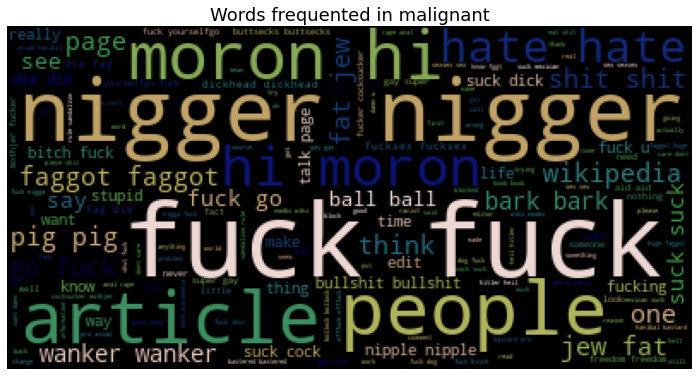

In [34]:
df_m=df.loc[:,['comment_text','malignant']]
wcloud(df_m,'malignant')

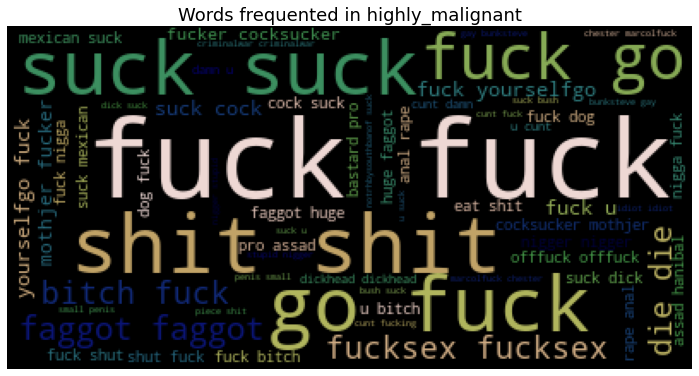

In [35]:
df_hm=df.loc[:,['comment_text','highly_malignant']]
wcloud(df_hm,'highly_malignant')

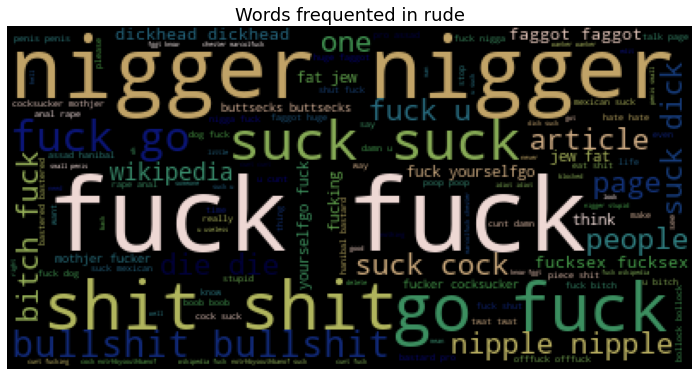

In [36]:
df_r=df.loc[:,['comment_text','rude']]
wcloud(df_r,'rude')

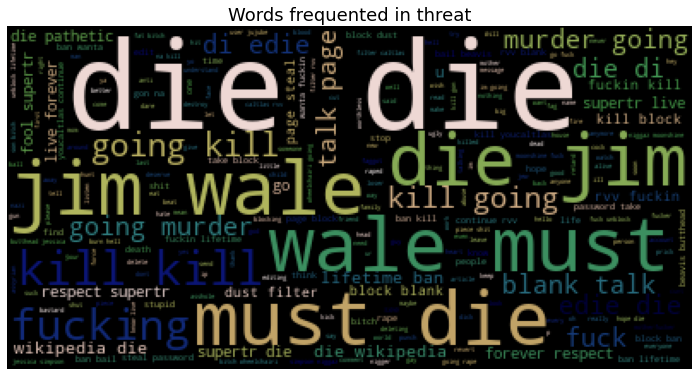

In [37]:
df_t=df.loc[:,['comment_text','threat']]
wcloud(df_t,'threat')

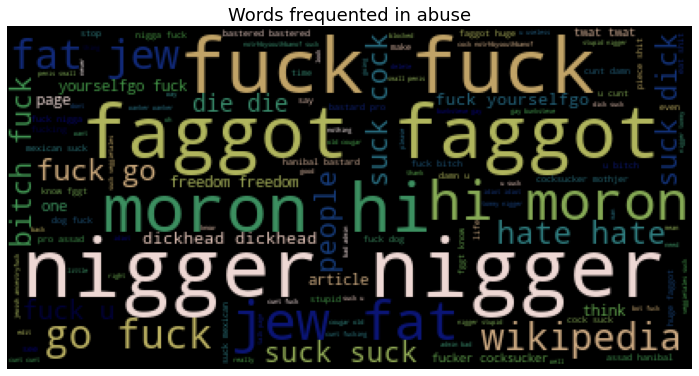

In [38]:
df_a=df.loc[:,['comment_text','abuse']]
wcloud(df_a,'abuse')

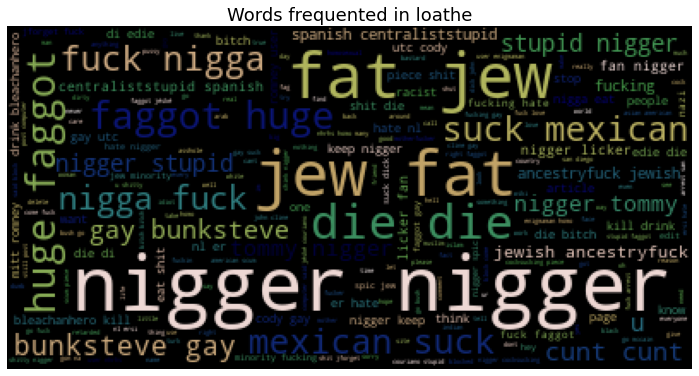

In [39]:
df_l=df.loc[:,['comment_text','loathe']]
wcloud(df_l,'loathe')

# Visualization:

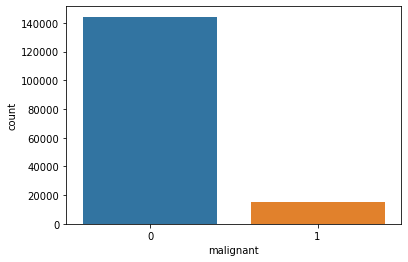

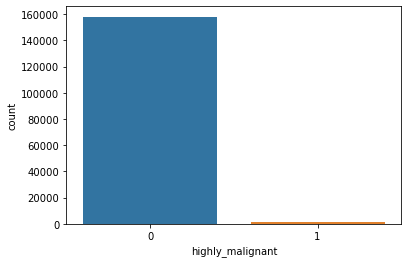

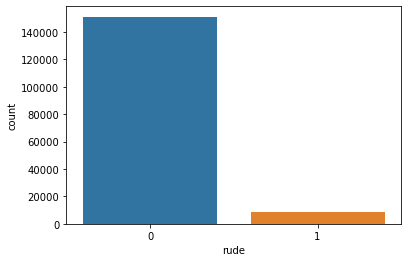

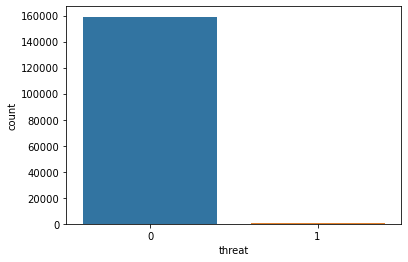

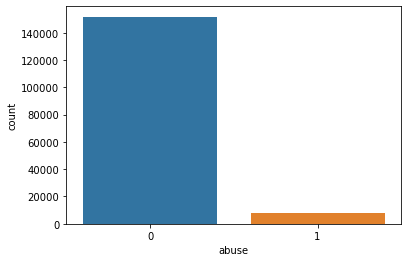

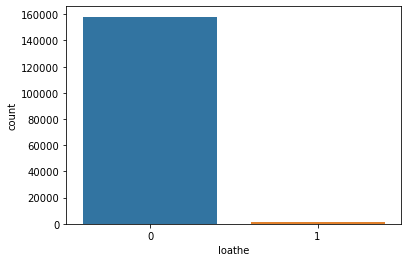

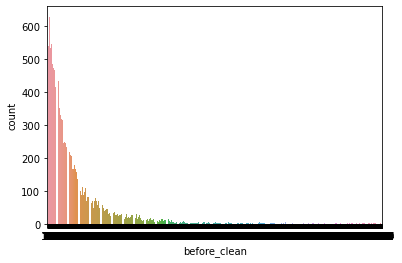

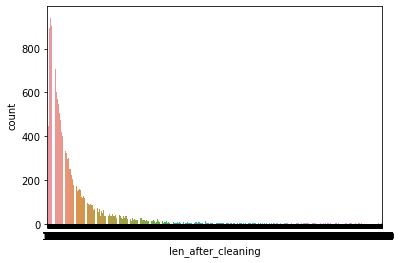

In [40]:
# lets plot all features using countplot
feat=df.columns[1:]
for col in feat:
    sns.countplot(df[col])
    plt.show()

* Here in the first graph of malignant we can clearly observe that most of the messages are not malignant.
* In the second image we can clearly observe that there are very less highly malignant messages.
* Same in third picture there are few rude comments in the dataset.
* In 4th we can clearly see that there are very few cases/almost negligible of threat comments
* In 5th image we can clearly see that there are some messages with abusive language.
* While in the sixth image we can clearly see that there are very few cases of loathe messages.
* In 7th image we can see the no. of words in each rows
* In 8th image we can see the cleaned no. of remaining words in each row.

In [41]:
# lets create a list of feature columns
featu=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [42]:
# lets store the no. of counts for every target
counts=df[featu].iloc[:,0:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

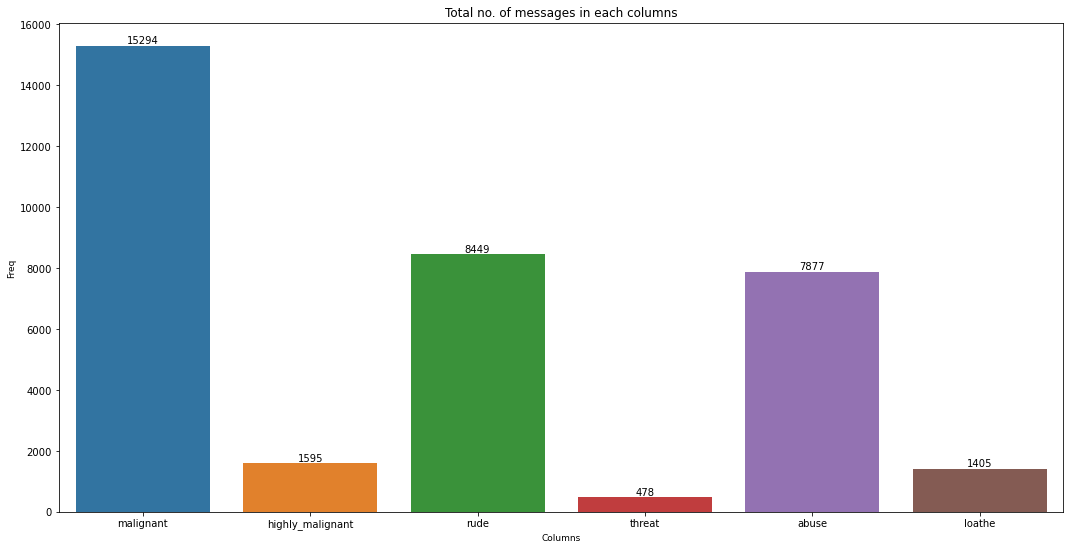

In [43]:
# lets plot and visualize count of each columns
plt.figure(figsize=(18,9))
ax=sns.barplot(counts.index,counts.values)
plt.title("Total no. of messages in each columns")
plt.ylabel('Freq', fontsize=9)
plt.xlabel('Columns',fontsize=9)
rects=ax.patches
labels=counts.values
for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',va='bottom' )
plt.show()

* Here we can clearly see that maximum no. of messages were sent in malignant messages category, followed by rude and abuse.

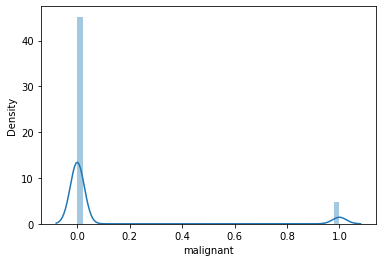

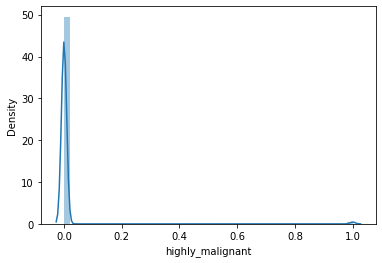

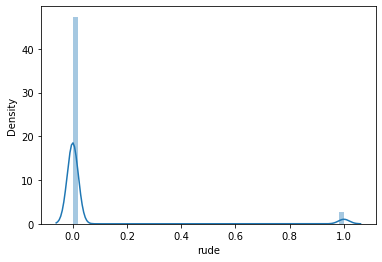

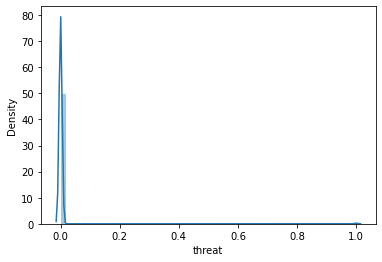

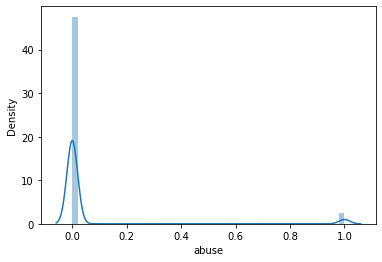

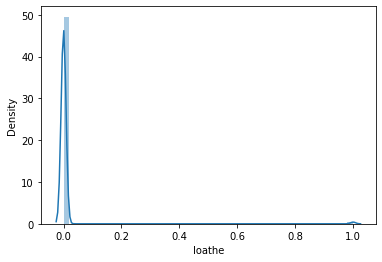

In [44]:
#lets check the distribution of data using distplot
for col in df[featu].describe().columns:
    sns.distplot(df[featu][col])
    plt.show()

* Here we can see data is skewed towards the right in all the columns.

In [45]:
# lets check the statistical description of all the columns
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.138847,241.114238
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.725381,377.602191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,56.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,123.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,436.000000,263.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,5000.000000


* Here we can see that only 2 values are present in all the columns i.e. 0 and 1.
* Low score of standard devaiation tells us that the data is not spreaded.
* there is difference in mean and median which tells us that some skewness is present.
* very low difference in 75% and max shows that there are no outliers present in the dataset.

In [46]:
# lets check the correlation amoung all the columns 
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.054413,-0.050770
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.010175,0.015696
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.042910,-0.038521
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.007917,-0.010726
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.045027,-0.040995
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.013628,-0.008135
before_clean,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,1.000000,0.987593
len_after_cleaning,-0.050770,0.015696,-0.038521,-0.010726,-0.040995,-0.008135,0.987593,1.000000


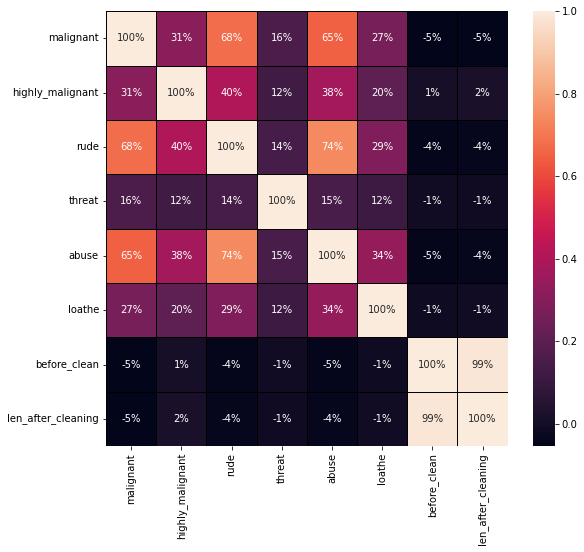

In [47]:
# lets visualize correlation using heatmap
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),linewidth=0.5, linecolor='black',fmt='.0%',annot=True)
plt.show()

# Data Pre-Processing

In [48]:
# lets create label column in train dataset
c_label= ['malignant','highly_malignant','rude','threat','abuse','loathe']
df[c_label].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [49]:
df['label']=df[c_label].sum(axis=1)
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning,label
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,364,0
4,sir hero chance remember page,0,0,0,0,0,0,67,29,0


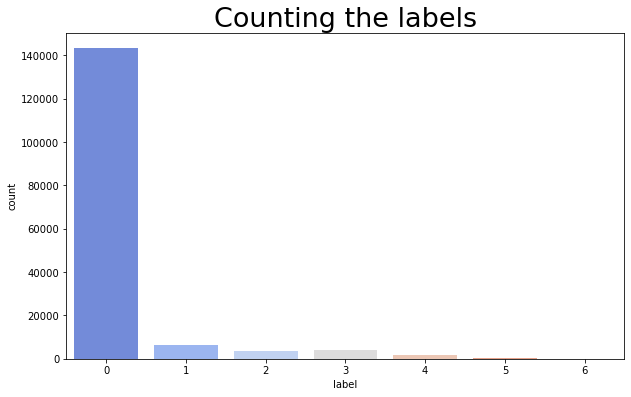

In [50]:
#lets Check the count of labels
plt.figure(figsize=(10,6))
sns.countplot(df['label'], palette='coolwarm')
plt.title('Counting the labels',fontsize=27)
plt.show()

# Model building:

# Vectorizer

In [51]:
# lets convert text data using TfidfVectorizer
# lets import library for vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
tfidf=TfidfVectorizer(max_features = 14000, stop_words='english')

In [52]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tfidf.fit_transform(df['comment_text'])

In [53]:
# lets first convert features into number vectors
y=df['label']

In [54]:
# lets check the shape of the dataset
print(X.shape,'\t\t',y.shape)

(159571, 14000) 		 (159571,)


In [55]:
#Doing the above process for test data 
test_vec = tfidf.fit_transform(df_test['comment_text'])
test_vec

<153164x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 3041271 stored elements in Compressed Sparse Row format>

In [ ]:
test_vec.shape

In [103]:
length = []
exclamation = []
question = []

for i in df.length:
   length.append([i])
for i in df.exclamation:
   exclamation.append([i])
for i in df.question:
   question.append([i])

AttributeError: 'DataFrame' object has no attribute 'length'

# Building the model:

In [57]:
#Splitting the training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [58]:
#Checking the shape of x data
print(x_train.shape,'\t\t',x_test.shape)

(111699, 14000) 		 (47872, 14000)


In [59]:
#Checking the shape of y data
print(y_train.shape,'\t',y_test.shape)


(111699,) 	 (47872,)


# Model Selection:

In [68]:
#Importing required libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score,jaccard_score, recall_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val-score

In [73]:
#Initializing the instance of the model
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()
rf = RandomForestClassifier()

In [74]:
def print_score(y_pred,clf):
    print('classifier:',clf.__class__.__name__)
    print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('========================================\n')    

In [75]:
#models with evaluation using OneVsRestClassifier
for classifier in [svc,lr,mnb,sgd,lgb,rf]:
   clf = OneVsRestClassifier(classifier)
   clf.fit(x_train,y_train)
   y_pred = clf.predict(x_test)
   print_score(y_pred, classifier)


classifier: LinearSVC
Jaccard score: 0.8478403520284093
Accuracy score: 0.9176554144385026
f1_score: 0.9176554144385026
Precision :  0.9176554144385026
Recall: 0.9176554144385026
Hamming loss:  0.08234458556149733
Confusion matrix:
  [[[ 2850  2018]
  [  257 42747]]

 [[45344   620]
  [ 1573   335]]

 [[46511   317]
  [  907   137]]

 [[45861   748]
  [  657   606]]

 [[47134   210]
  [  431    97]]

 [[47729    27]
  [  108     8]]

 [[47861     2]
  [    9     0]]]

classifier: LogisticRegression
Jaccard score: 0.8443875093910732
Accuracy score: 0.9156291778074866
f1_score: 0.9156291778074866
Precision :  0.9156291778074866
Recall: 0.9156291778074866
Hamming loss:  0.08437082219251336
Confusion matrix:
  [[[ 2130  2738]
  [   97 42907]]

 [[45521   443]
  [ 1685   223]]

 [[46676   152]
  [  991    53]]

 [[45991   618]
  [  661   602]]

 [[47261    83]
  [  481    47]]

 [[47751     5]
  [  115     1]]

 [[47863     0]
  [    9     0]]]

classifier: MultinomialNB
Jaccard score: 0.83

* we have got LinearSVC as our best model, so we will perform hyper parameter tuning on LinearSVC and try to increase its accuracy score.

# Hyper parameter tuning:

In [76]:
#Creating parameter list to pass in GridSearchCV
param = {
        'estimator__penalty': ['l1'],
        'estimator__loss': ['hinge','squared_hinge'],
        'estimator__multi_class': ['ovr','crammer_singer'],
        'estimator__dual': [False],
        'estimator__intercept_scaling': [2,4,5],
        'estimator__C': [2]
        }

In [77]:
from sklearn.model_selection import GridSearchCV
svc = OneVsRestClassifier(LinearSVC())
GCV =  GridSearchCV(svc,param,cv = 3, verbose =0,n_jobs=-1)
GCV.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             n_jobs=-1,
             param_grid={'estimator__C': [2], 'estimator__dual': [False],
                         'estimator__intercept_scaling': [2, 4, 5],
                         'estimator__loss': ['hinge', 'squared_hinge'],
                         'estimator__multi_class': ['ovr', 'crammer_singer'],
                         'estimator__penalty': ['l1']})

In [78]:
GCV.best_par
ams_

{'estimator__C': 2,
 'estimator__dual': False,
 'estimator__intercept_scaling': 2,
 'estimator__loss': 'hinge',
 'estimator__multi_class': 'crammer_singer',
 'estimator__penalty': 'l1'}

# Final Model:

In [79]:
model = OneVsRestClassifier(LinearSVC(C=2,dual = False, loss='hinge',multi_class='crammer_singer', penalty ='l1',intercept_scaling=2))
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
print("Precision : ", precision_score(y_test,y_pred,average='micro'))
print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
print("Hamming loss: ", hamming_loss(y_test,y_pred))
print("\nConfusion matrix: \n", multilabel_confusion_matrix(y_test,y_pred))

Jaccard score: 0.8479830148619958
Accuracy score: 0.9177389705882353
f1_score: 0.9177389705882353
Precision :  0.9177389705882353
Recall: 0.9177389705882353
Hamming loss:  0.0822610294117647

Confusion matrix: 
 [[[ 2889  1979]
  [  279 42725]]

 [[45465   499]
  [ 1633   275]]

 [[46575   253]
  [  904   140]]

 [[45764   845]
  [  598   665]]

 [[47064   280]
  [  411   117]]

 [[47685    71]
  [  104    12]]

 [[47852    11]
  [    9     0]]]


* Here we have successfully improved slightly prediction score from 91.76 to 91.77%.

In [80]:
lsvc_prediction=model.predict(X)
#Making a dataframe of predictions
malignant_prediction=pd.DataFrame({'Predictions':lsvc_prediction})
malignant_prediction

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
159566,0
159567,0
159568,0
159569,0


# Saving Our Best Model:

In [85]:
#Saving the model
import pickle
filename='MalignantCommentsClassifier.pkl'
pickle.dump(model,open(filename,'wb'))

In [86]:
#Checking our vectorized test data
test_vec

<153164x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 3041271 stored elements in Compressed Sparse Row format>

In [87]:
#Loading the model
fitted_model=pickle.load(open('MalignantCommentsClassifier.pkl','rb'))
fitted_model

OneVsRestClassifier(estimator=LinearSVC(C=2, dual=False, intercept_scaling=2,
                                        loss='hinge',
                                        multi_class='crammer_singer',
                                        penalty='l1'))

# Prediction using test dataset:

In [90]:
#Test predictions
test_results=pd.DataFrame(test_df)
test_results.to_csv('Malignant_TestDataPredictions.csv')

In [91]:
#Train predictions
malignant_prediction.to_csv('Malignant_TrainDataPredictions.csv')

In [92]:
#Lets load the test data set
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [95]:
#Lets load the test data set
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [115]:
#Predictions
test_prediction=model.predict(test_vec)
test_df=pd.DataFrame({'Predictions':test_prediction})
test_df

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0


In [116]:
# lets save the predictions
test_results=pd.DataFrame(test_df)
test_results.to_csv('Malignant_TestDataPredictions.csv')

# saving the predictions

In [117]:
malignant_prediction.to_csv('Malignant_DataPredictions.csv')

* Finally, we had predicted over the test data and the predictions obtained were saved in a csv file.